Project - Regression Model for Used Car Price Analysis

Import module / library


In [124]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats


Connect source

In [125]:
# Load source (csv)
df = pd.read_csv("Car details v3.csv")

# Show data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Checking data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


We can see there's null values on mileage, engine, max_power, torque, and seats
We're going to do some cleanup first

In [127]:
# Count data inside variable fuel
fuel_counts = df["fuel"].value_counts()

# shows result
print(fuel_counts)


fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


In [128]:
# Count data inside variable fuel
seats_counts = df["seats"].value_counts()

# shows result
print(seats_counts)

seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64


We will focus our analysis on "common cars" and exclude vehicles that use gas-based fuels such as CNG and LPG, as well as cars with seating capacities exceeding 8.


While we're at it, we'll also clean some other columns.

In [129]:
# Only use "diesel" and "petrol" on [fuel]
df_clean = df[df["fuel"].isin(["Diesel", "Petrol"])]

# Take out rows that has null values on [seats]
df_clean = df_clean.dropna(subset=["seats"])

# Only use car seats 8 or below
df_clean = df_clean[df_clean['seats'] <= 8]

# Convert [mileage] to be string
df_clean["mileage"] = df_clean["mileage"].astype(str)

# Replace " kmpl" in [mileage]
df_clean["mileage"] = df_clean["mileage"].str.replace(" kmpl", "")

# Change data type for [mileage] 
df_clean["mileage"] = df_clean["mileage"].astype("float64")

# Convert [mileage] to be string
df_clean["engine"] = df_clean["engine"].astype(str)

# Replace " CC" in [engine]
df_clean["engine"] = df_clean["engine"].str.replace(" CC", "")

# Change data type for [engine] 
df_clean["engine"] = df_clean["engine"].astype("int64")

# Change data type for [engine] 
df_clean["seats"] = df_clean["seats"].astype("int64")

# Take out rows with 0.0 values on [mileage]
df_clean = df_clean[df_clean["mileage"] != 0.0]

# Calculating used car age by subtracting current year - car year (year it was bought)
# Get curren year
current_year = datetime.datetime.now().year

# Membuat kolom "used_car_age" dengan perhitungan umur mobil
df_clean["used_car_age"] = current_year - df_clean["year"]

# Mengubah tipe data kolom "used_car_age" menjadi integer
df_clean["used_car_age"] = df_clean["used_car_age"].astype(int)

df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,used_car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,22.4 kgm at 1750-2750rpm,5,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,16


In [130]:
# Drop unused column
df_clean = df_clean.drop(columns=["name", "year", "max_power", "torque"])

Checking for Outliers

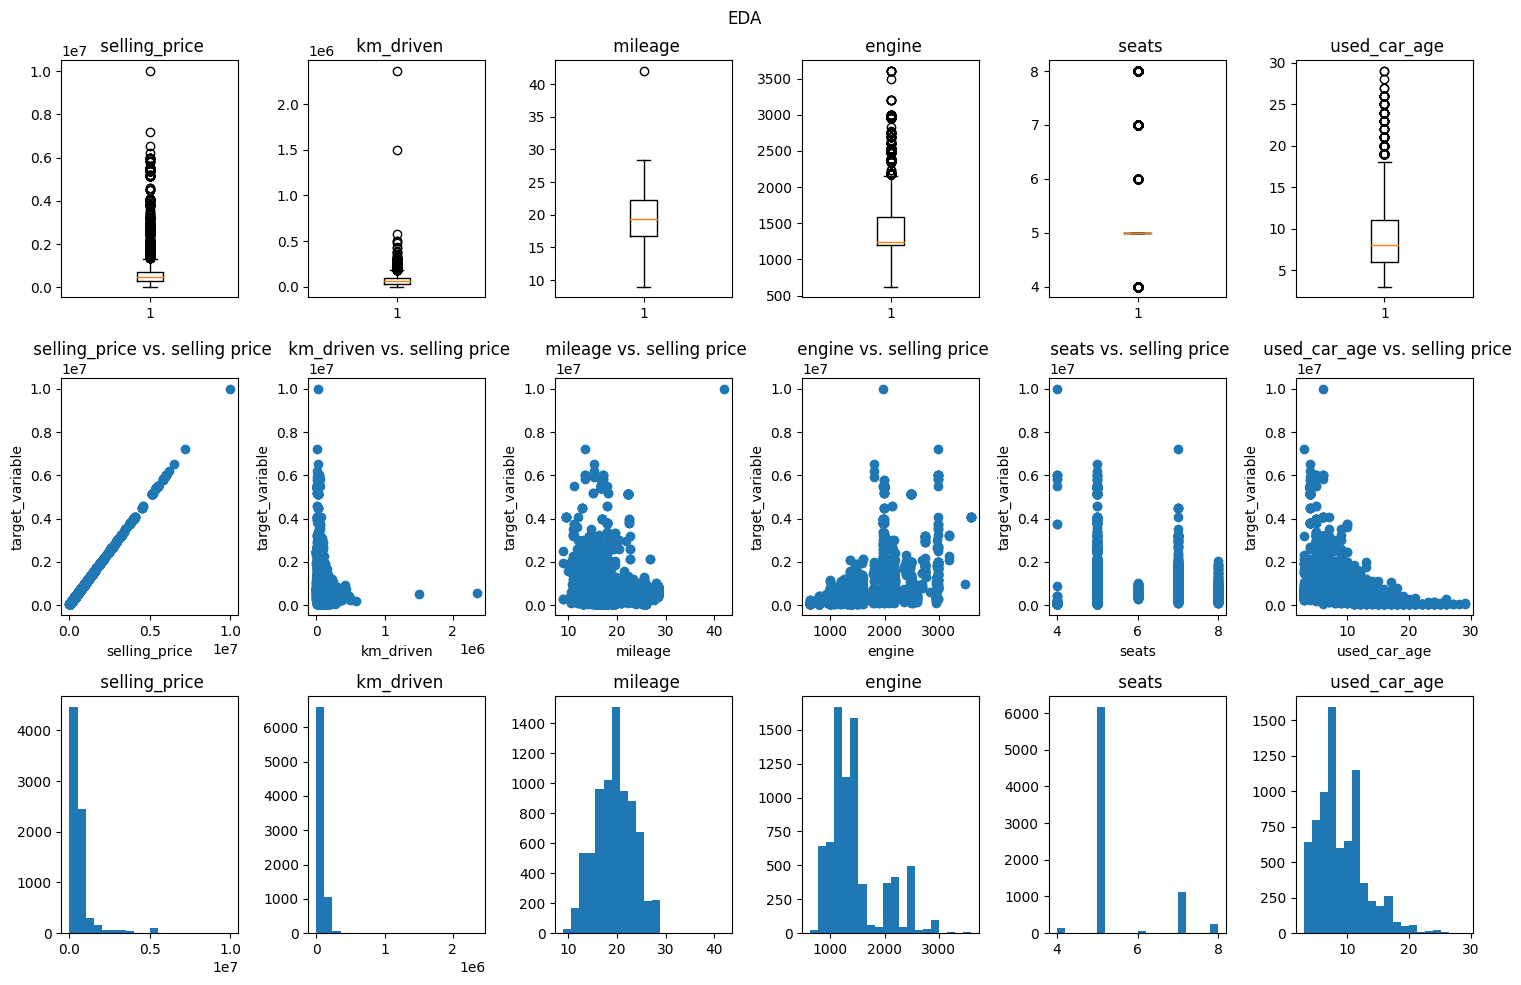

In [131]:
# Select numerical columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Set up subplots
fig, axs = plt.subplots(3, len(numeric_cols), figsize=(15, 10))
fig.suptitle("EDA")

# Box plot
for i, col in enumerate(numeric_cols):
    axs[0, i].boxplot(df_clean[col])
    axs[0, i].set_title(f" {col}")

# Scatter plot
for i, col in enumerate(numeric_cols):
    axs[1, i].scatter(df_clean[col], df_clean["selling_price"])
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel("target_variable")
    axs[1, i].set_title(f" {col} vs. selling price")

# Histogram
for i, col in enumerate(numeric_cols):
    axs[2, i].hist(df_clean[col], bins=20)
    axs[2, i].set_title(f" {col}")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

It looks like there's outliers for selling_price, km_driven, mileage, and used_car_age. We'll need to check more throughly for outliers.

In [132]:
#Create function to identify by calculate the upper and lower limits of outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile
    low_limit = quartile1 - 1.5 * interquartile
    return low_limit, up_limit

def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    num_outliers = len(outliers)
    print(f"Number of outliers in column '{col_name}': {num_outliers}")
    return outliers


In [133]:
# Check how many outliers on columns
number_of_outliers = check_outliers(df_clean, "selling_price")
number_of_outliers = check_outliers(df_clean, "km_driven")
number_of_outliers = check_outliers(df_clean, "mileage")
number_of_outliers = check_outliers(df_clean, "used_car_age")

Number of outliers in column 'selling_price': 590
Number of outliers in column 'km_driven': 192
Number of outliers in column 'mileage': 1
Number of outliers in column 'used_car_age': 163


It turns out only selling_price and km_driven that has outliers

In [134]:
# Create function to remove outliers
def remove_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe = dataframe[(dataframe[col_name] >= low_limit) & (dataframe[col_name] <= up_limit)]
    return dataframe

In [135]:
# Remove the rows that contains outliers
df_clean = remove_outliers(df_clean, "selling_price")
df_clean = remove_outliers(df_clean, "km_driven")

Showing data after remove outliers

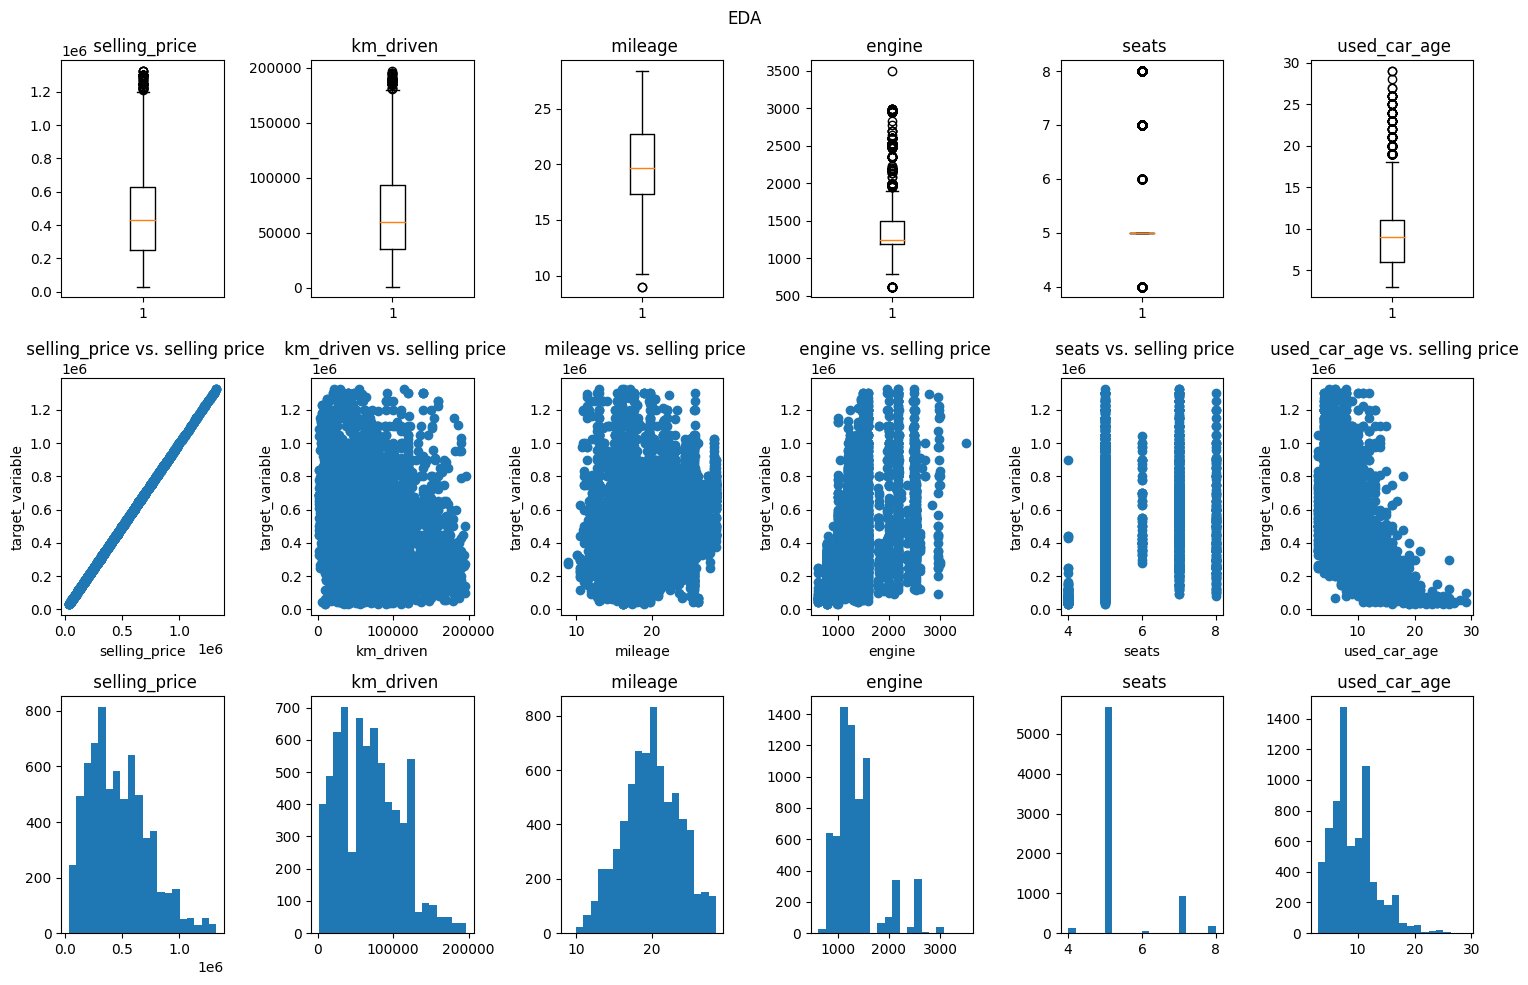

In [136]:
# Select numerical columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Set up subplots
fig, axs = plt.subplots(3, len(numeric_cols), figsize=(15, 10))
fig.suptitle("EDA")

# Box plot
for i, col in enumerate(numeric_cols):
    axs[0, i].boxplot(df_clean[col])
    axs[0, i].set_title(f" {col}")

# Scatter plot
for i, col in enumerate(numeric_cols):
    axs[1, i].scatter(df_clean[col], df_clean["selling_price"])
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel("target_variable")
    axs[1, i].set_title(f" {col} vs. selling price")

# Histogram
for i, col in enumerate(numeric_cols):
    axs[2, i].hist(df_clean[col], bins=20)
    axs[2, i].set_title(f" {col}")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

There should be no more outliers in the data now

In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6966 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6966 non-null   int64  
 1   km_driven      6966 non-null   int64  
 2   fuel           6966 non-null   object 
 3   seller_type    6966 non-null   object 
 4   transmission   6966 non-null   object 
 5   owner          6966 non-null   object 
 6   mileage        6966 non-null   float64
 7   engine         6966 non-null   int64  
 8   seats          6966 non-null   int64  
 9   used_car_age   6966 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 571.4+ KB


In [138]:
total_rows_df = len(df)
total_rows_df_clean = len(df_clean)

percentage_diff = ((total_rows_df_clean / total_rows_df) - 1)
print(f"Number of rows at the beginning : {total_rows_df}")
print(f"Number of rows after data cleaning : {total_rows_df_clean}")
print(f"% Difference : {percentage_diff:.2%}")

Number of rows at the beginning : 8128
Number of rows after data cleaning : 6966
% Difference : -14.30%


Exploratory Data Analysis

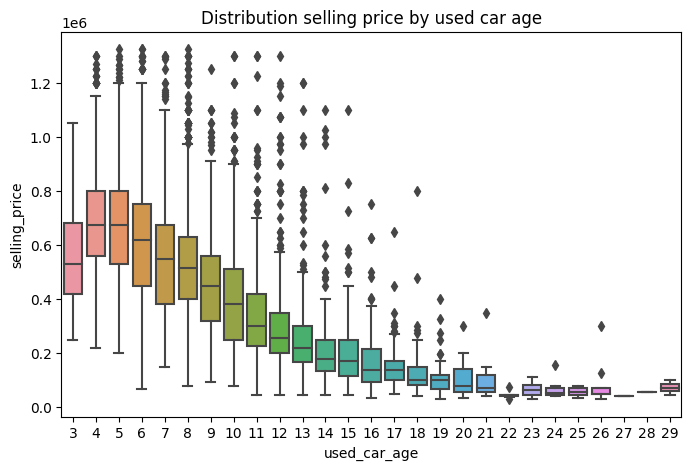

In [139]:
# Distribution selling_price based on used_car_age by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "used_car_age", y = "selling_price", hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by used car age")
plt.show()

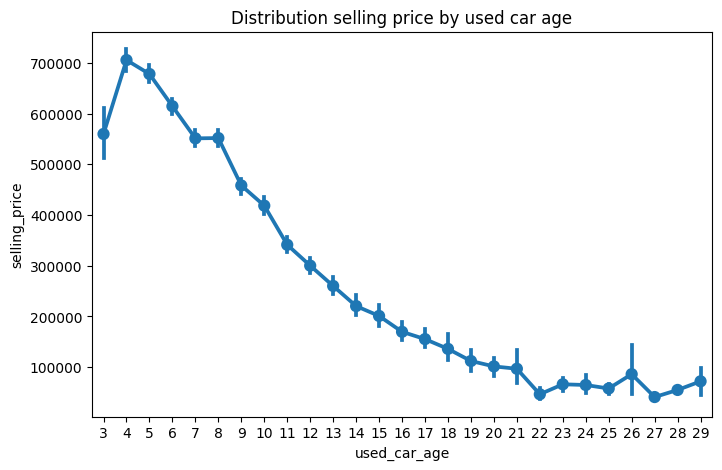

In [140]:
# Distribution selling_price based on used_car_age by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "used_car_age", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by used car age")
plt.show()

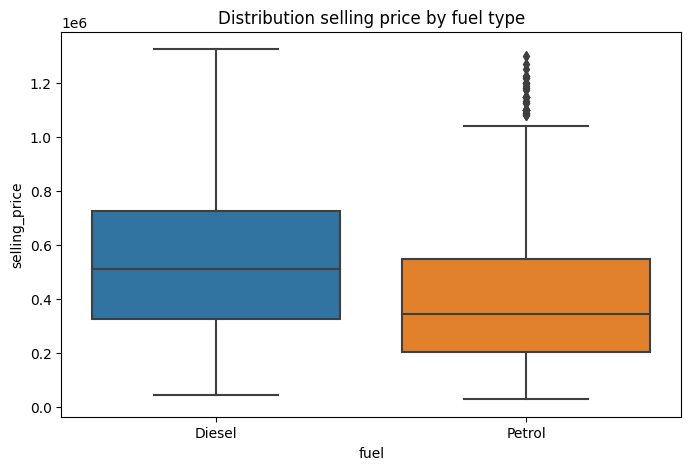

In [141]:
# Distribution selling_price based on fuel by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "fuel", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by fuel type")
plt.show()

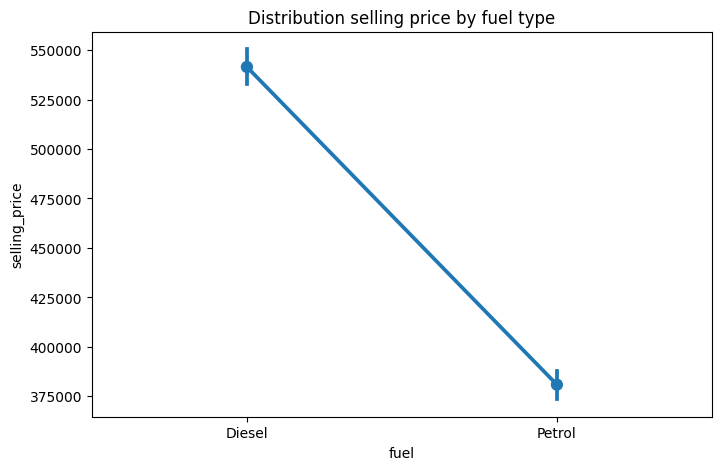

In [142]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "fuel", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by fuel type")
plt.show()

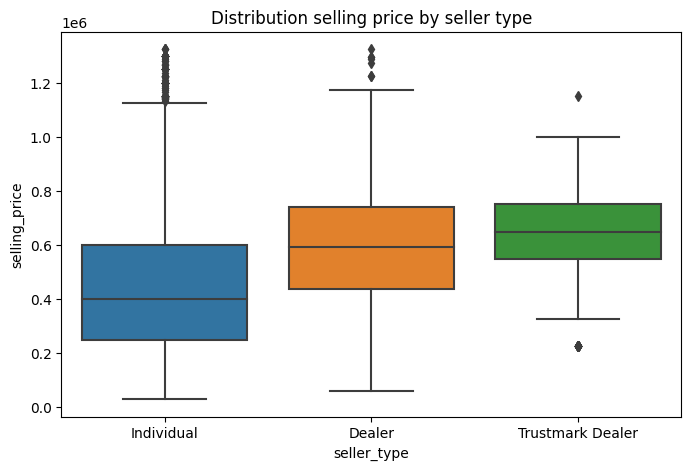

In [143]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "seller_type", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seller type")
plt.show()

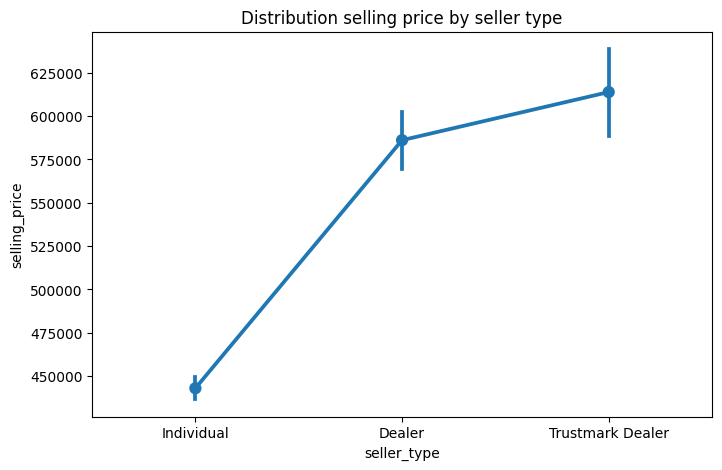

In [144]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "seller_type", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seller type")
plt.show()

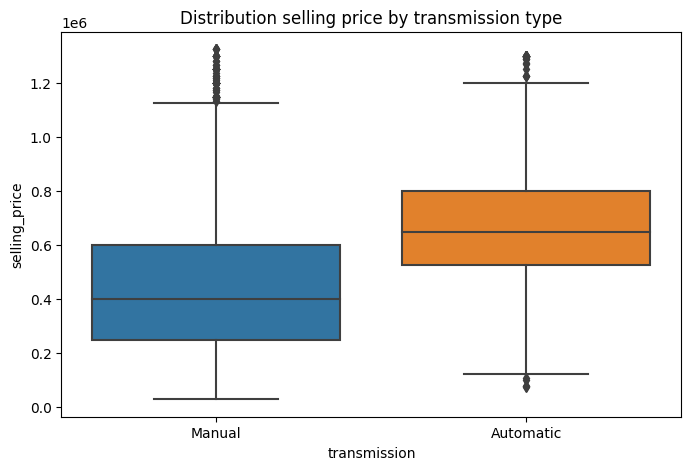

In [145]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "transmission", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by transmission type")
plt.show()

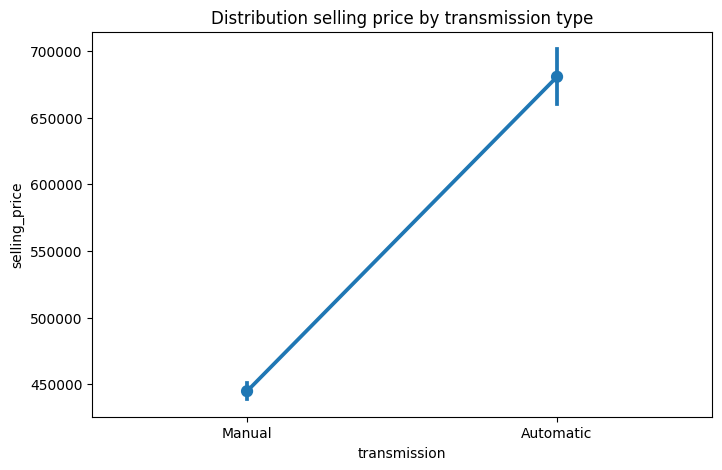

In [146]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "transmission", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by transmission type")
plt.show()

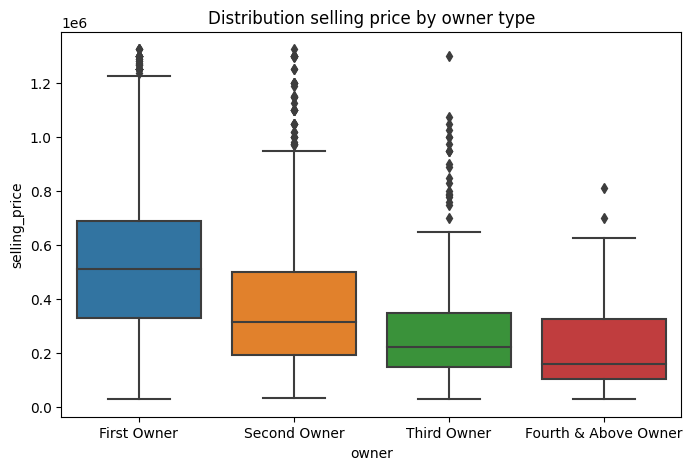

In [147]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "owner", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by owner type")
plt.show()

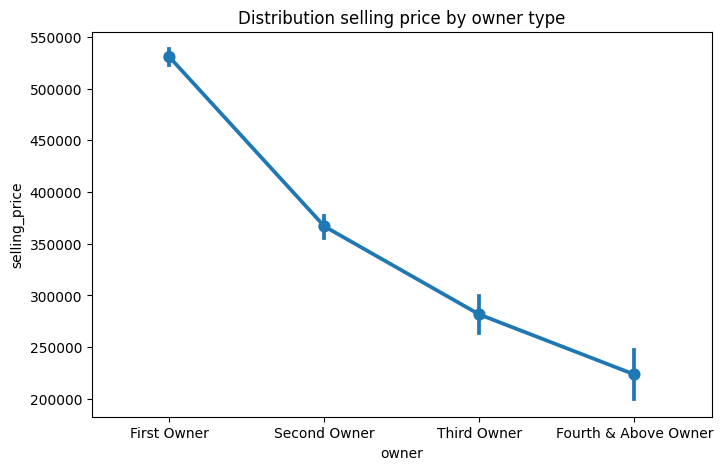

In [148]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "owner", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by owner type")
plt.show()

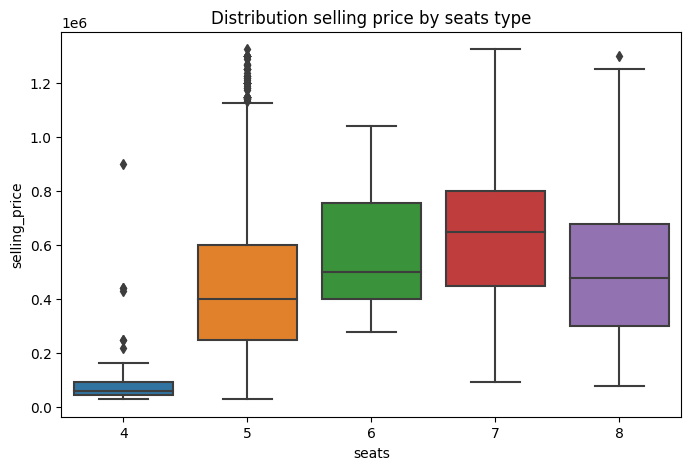

In [149]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "seats", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seats type")
plt.show()

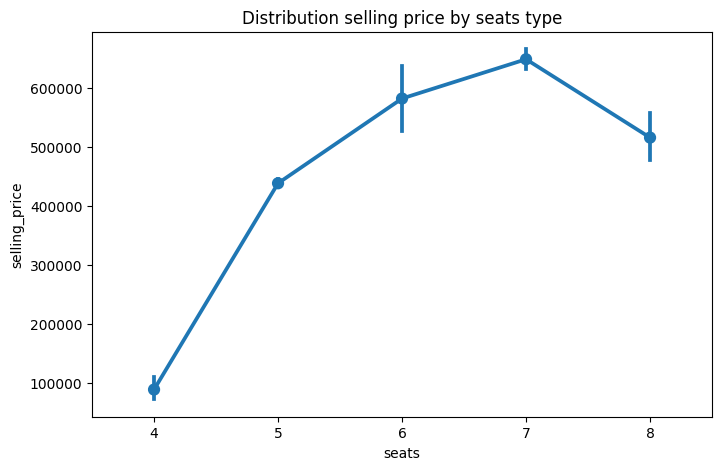

In [150]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "seats", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seats type")
plt.show()

Statistical Test

Hypothesis Tests on Selling Price by fuel type

In [151]:
# Split data based on fuel
diesel_group = df_clean[df_clean["fuel"] == "Diesel"]["selling_price"] #Variable for diesel
petrol_group = df_clean[df_clean["fuel"] == "Petrol"]["selling_price"] #Variable fir petrol

# Perform t-test
t_stat, p_value = stats.ttest_ind(diesel_group, petrol_group, equal_var=False)

print("Hypothesis test result")
print(f"sample size for diesel {diesel_group.shape[0]}")
print(f"sample size for petrol {petrol_group.shape[0]}")
print("-"*40)

# Set significance level
alpha = 0.05

# Hypothesis statement
print("Hypothesis:")
print("H0 = Used car price with fuel type diesel <= Used car price with fuel type petrol")
print("H1 = Used car price with fuel type diesel > Used car price with fuel type petrol")
print("-"*40)
# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*40)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on t-test, it can be concluded:")
if p_value < alpha:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis not rejected")


Hypothesis test result
sample size for diesel 3592
sample size for petrol 3374
----------------------------------------
Hypothesis:
H0 = Used car price with fuel type diesel <= Used car price with fuel type petrol
H1 = Used car price with fuel type diesel > Used car price with fuel type petrol
----------------------------------------
t-statistic:  27.302608452040637
p-value:  6.514260280023043e-156
alpha : 0.05
----------------------------------------
Based on t-test, it can be concluded:
Null hypothesis rejected


Hypothesis tests on selling price by transmission type

In [152]:
# Split data based on fuel
manual_group = df_clean[df_clean["transmission"] == "Manual"]["selling_price"] #Variable for manual
auto_group = df_clean[df_clean["transmission"] == "Automatic"]["selling_price"] #Variable fir automatic

# Perform t-test
t_stat, p_value = stats.ttest_ind(manual_group, auto_group, equal_var=False)

print("Hypothesis test result")
print(f"sample size for manual {manual_group.shape[0]}")
print(f"sample size for automatic {auto_group.shape[0]}")
print("-"*40)

# Set significance level
alpha = 0.05

# Hypothesis statement
print("Hypothesis:")
print("H0 = Used car price with transmission type manual <= Used car price with type automatic")
print("H1 = Used car price with transmission type automatic > Used car price with transmission type manual")
print("-"*40)
# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*40)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on t-test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")


Hypothesis test result
sample size for manual 6409
sample size for automatic 557
----------------------------------------
Hypothesis:
H0 = Used car price with transmission type manual <= Used car price with type automatic
H1 = Used car price with transmission type automatic > Used car price with transmission type manual
----------------------------------------
t-statistic:  -21.43854116542085
p-value:  9.404939151927018e-78
alpha : 0.05
----------------------------------------
Based on t-test, it can be concluded:
Reject H0


Hypothesis tests on selling price by seller type

In [153]:
# Perform ANOVA test
model = ols("selling_price ~ seller_type", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["seller_type", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between seller_type")
print("H1 = There is a significant difference in the average selling_price between at least two seller_type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between seller_type
H1 = There is a significant difference in the average selling_price between at least two seller_type
---------------------------------------------------------------------------------------------------------
p-value:  2.6459351957129867e-62
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Hypothesis tests on selling price by owner type

In [154]:
# Perform ANOVA test
model = ols("selling_price ~ owner", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["owner", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between owner type")
print("H1 = There is a significant difference in the average selling_price between at least two owner type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between owner type
H1 = There is a significant difference in the average selling_price between at least two owner type
---------------------------------------------------------------------------------------------------------
p-value:  4.0203232839128686e-212
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Hypothesis tests on selling price by seats type

In [155]:
# Perform ANOVA test
model = ols("selling_price ~ seats", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["seats", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between seats type")
print("H1 = There is a significant difference in the average selling_price between at least two seats type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between seats type
H1 = There is a significant difference in the average selling_price between at least two seats type
---------------------------------------------------------------------------------------------------------
p-value:  4.1071969680536596e-128
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Correlation Matrix

Creating variable dummy for categorical variable

In [156]:
# Convert to dummy variable
convert = pd.get_dummies(data=df_clean, columns=["fuel", "seller_type", "transmission", "owner"])
convert = convert.astype(int)

convert.head()

,selling_price,km_driven,mileage,engine,seats,used_car_age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,450000,145500,23,1248,5,9,1,0,0,1,0,0,1,1,0,0,0
1,370000,120000,21,1498,5,9,1,0,0,1,0,0,1,0,0,1,0
2,158000,140000,17,1497,5,17,0,1,0,1,0,0,1,0,0,0,1
3,225000,127000,23,1396,5,13,1,0,0,1,0,0,1,1,0,0,0
4,130000,120000,16,1298,5,16,0,1,0,1,0,0,1,1,0,0,0


In [162]:
# Calculate correlation matrix
correlation = convert.corr()

# SHow result
correlation

,selling_price,km_driven,mileage,engine,seats,used_car_age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
selling_price,1.000000,-0.255495,0.061019,0.400245,0.282654,-0.634558,0.309380,-0.309380,0.166132,-0.199104,0.100576,0.246632,-0.246632,0.347622,-0.134926,-0.224731,-0.189688
km_driven,-0.255495,1.000000,-0.209094,0.319206,0.214501,0.489381,0.405986,-0.405986,-0.137177,0.185513,-0.126433,-0.162627,0.162627,-0.361223,0.107824,0.251260,0.184356
mileage,0.061019,-0.209094,1.000000,-0.542834,-0.448470,-0.406712,0.172375,-0.172375,0.081283,-0.043301,-0.062004,-0.087822,0.087822,0.211269,-0.079008,-0.137450,-0.115457
engine,0.400245,0.319206,-0.542834,1.000000,0.651194,0.066121,0.516828,-0.516828,0.012389,-0.021327,0.020816,0.069907,-0.069907,-0.084256,0.004566,0.081686,0.014187
seats,0.282654,0.214501,-0.448470,0.651194,1.000000,-0.029515,0.343160,-0.343160,-0.044797,0.044161,-0.007541,-0.050627,0.050627,-0.029432,-0.008838,0.038700,-0.006962
used_car_age,-0.634558,0.489381,-0.406712,0.066121,-0.029515,1.000000,-0.019071,0.019071,-0.139378,0.178990,-0.108936,-0.152297,0.152297,-0.481454,0.202697,0.303632,0.267107
fuel_Diesel,0.309380,0.405986,0.172375,0.516828,0.343160,-0.019071,1.000000,-1.000000,0.021078,0.039965,-0.121289,-0.131552,0.131552,-0.065060,-0.005571,0.073833,-0.002757
fuel_Petrol,-0.309380,-0.405986,-0.172375,-0.516828,-0.343160,0.019071,-1.000000,1.000000,-0.021078,-0.039965,0.121289,0.131552,-0.131552,0.065060,0.005571,-0.073833,0.002757
seller_type_Dealer,0.166132,-0.137177,0.081283,0.012389,-0.044797,-0.139378,0.021078,-0.021078,1.000000,-0.874138,-0.061141,0.146328,-0.146328,0.183303,-0.051323,-0.131857,-0.087836
seller_type_Individual,-0.199104,0.185513,-0.043301,-0.021327,0.044161,0.178990,0.039965,-0.039965,-0.874138,1.000000,-0.431323,-0.209688,0.209688,-0.199750,0.058713,0.139074,0.102231


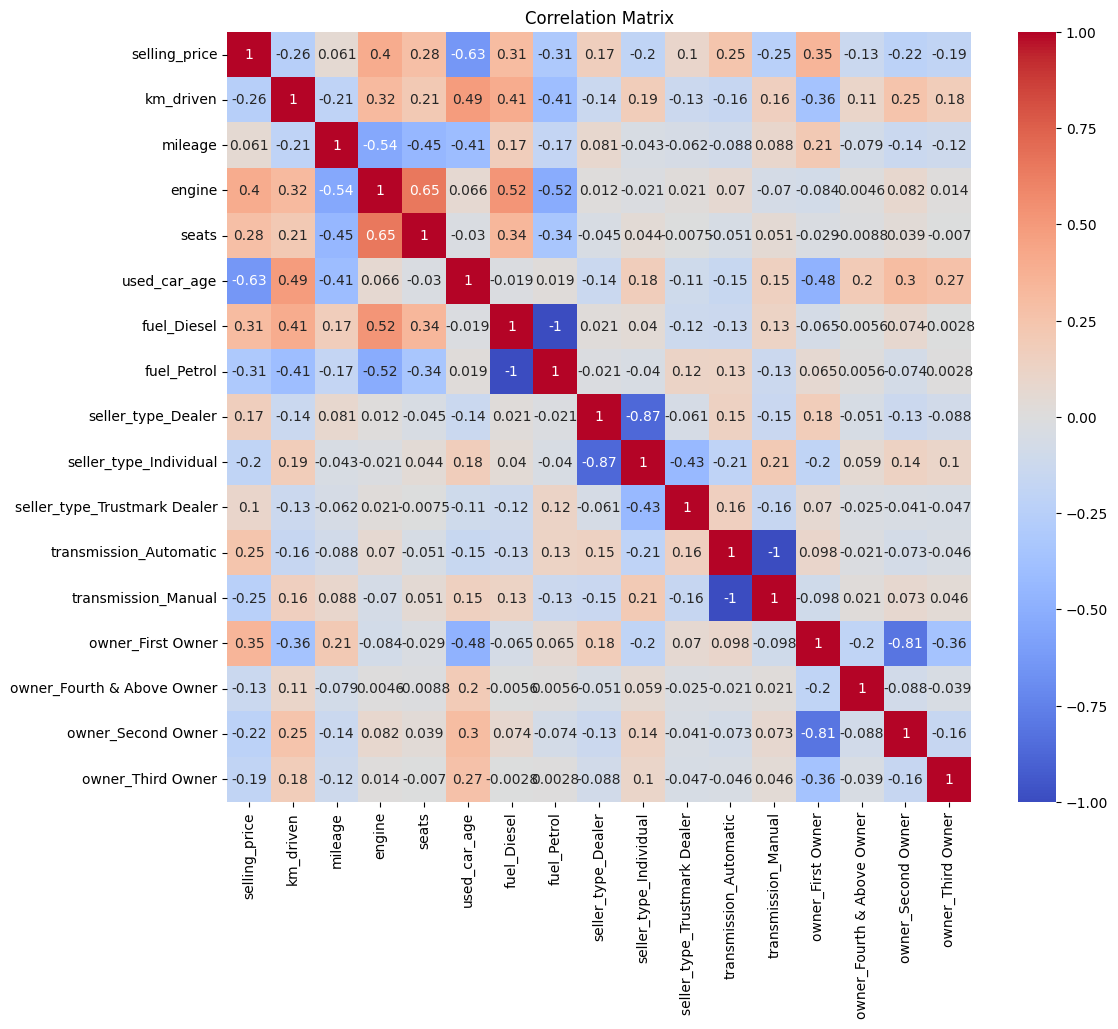

In [163]:
# Configure plot size
plt.figure(figsize=(12, 10))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

# Show result
plt.show()

In [165]:
# Drop columns that has low correlation
df_clean = convert.drop(columns=["seats", "km_driven", "mileage", "seller_type_Dealer", "seller_type_Individual", "seller_type_Trustmark Dealer", "owner_Fourth & Above Owner", "owner_Second Owner", "owner_Third Owner"])

df_clean.head()

,selling_price,engine,used_car_age,fuel_Diesel,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner
0,450000,1248,9,1,0,0,1,1
1,370000,1498,9,1,0,0,1,0
2,158000,1497,17,0,1,0,1,0
3,225000,1396,13,1,0,0,1,1
4,130000,1298,16,0,1,0,1,1


Regression Model

In [167]:
# Separating the dependent variable and the predictor variable
y = df_clean["selling_price"]
X = df_clean.drop("selling_price", axis=1)

# Adding constants to predictor variables
X = sm.add_constant(X)

# Building the OLS regression model
model = sm.OLS(y, X)

# Fitting models to data
results = model.fit()

# Displays the model summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2366.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:42:45   Log-Likelihood:                -93264.
No. Observations:                6966   AIC:                         1.865e+05
Df Residuals:                    6960   BIC:                         1.866e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.75